# PypeCast - Simple example

### Import the essential classes

In [1]:
import pandas as pd
import numpy as np
from pypecast.models import MLP, Simple_LSTM
from pypecast.models.Het_LSTM import MDN_Het_LSTM
from pypecast.features import BuildFeaturesSupervised
from pypecast.descriptor import SeriesDescriptor

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/processed/merged_90_days.csv').drop(['Unnamed: 0', 'Var'], axis=1)
#test_df = pd.read_csv('../data/processed/test/merged_4_days.csv').drop(['Unnamed: 0', 'Var'], axis=1)
df = df[df.Simb == 'PETR4'].Med
dummy = pd.read_csv('../data/example/dummy.csv')
dummy = dummy.Sales.loc[:35].apply(lambda x: float(x))
series = dummy

### Descriptor

In [3]:
sd = SeriesDescriptor()

-> Visualization of the series data:


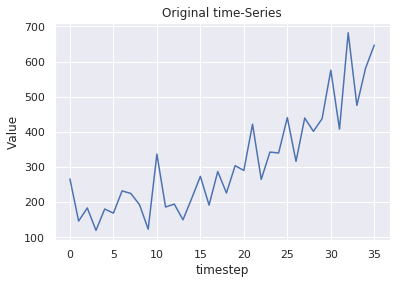

-> Description of the series data:
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000
-------------------- Histogram --------------------


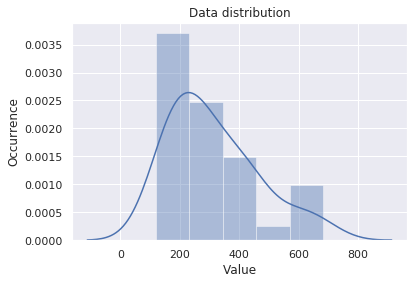

-> Autocorrelation and partial autocorrelation:


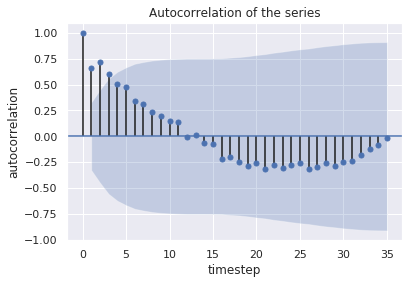

-> Checking for outliers:


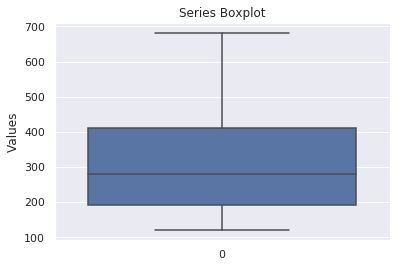

In [4]:
sd.full_report(data=series)

### Build features for supervised learning

In [5]:
n_lag = 5 #Must define the lag window (ANN input size)
n_seq = 1 #Must also define the number of future timesteps to forecast

bf = BuildFeaturesSupervised(n_lag,n_seq, difference=True,scaler_type='std')

In [6]:
scaler, train, test = bf.transform_data(series)

### Define a PypeCast Model

In [7]:
model = MDN_Het_LSTM(n_lag, n_seq, 1)

#### Fit the model on training set

In [13]:
model.fit(train, n_batch = 1, n_epoch=100, early_stopping=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1, 5)         0                                            
__________________________________________________________________________________________________
LSTM_1 (LSTM)                   (None, 5)            220         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 1)            6           LSTM_1[0][0]                     
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1)            6           LSTM_1[0][0]                     
__________________________________________________________________________________________________
dense_6 (D

#### Make forecasts in the test set and evaluate them

In [14]:
forecasts = model.forecast_series(test=test, scaler=scaler, orig_series=series)

[0.61715335, 0.5768349, 0.39772588, 0.41480854, 0.10324804, 0.46542448]


In [15]:
model.evaluate_forecast(save_report=True)

--------------------Forecast evaluation--------------------

Step t+1
t+1 RMSE: 154.929185
t+1 MAE: 142.269538
t+1 MAPE: 0.295815
t+1 sMAPE: 0.296264
------------------------------------------------------------

--------------------Naive forecast evaluation--------------------
Step t+1
t+1 RMSE: 305.552669
t+1 MAE: 280.700000
t+1 MAPE: 0.652234
t+1 sMAPE: 0.578473
------------------------------------------------------------

--------------------Evaluation for each forecast--------------------
Index 1 RMSE: 177.815569
Index 1 MAE: 177.815569
Index 1 MAPE: 0.307959
Index 1 sMAPE: 0.364009
Index 1 MAE Keep: nan
------------------------------------------------------------
Index 2 RMSE: 118.547423
Index 2 MAE: 118.547423
Index 2 MAPE: 0.507915
Index 2 sMAPE: 0.405050
Index 2 MAE Keep: 118.547423
------------------------------------------------------------
Index 3 RMSE: 247.816487
Index 3 MAE: 247.816487
Index 3 MAPE: 0.348155
Index 3 sMAPE: 0.421534
Index 3 MAE Keep: nan
-------------------

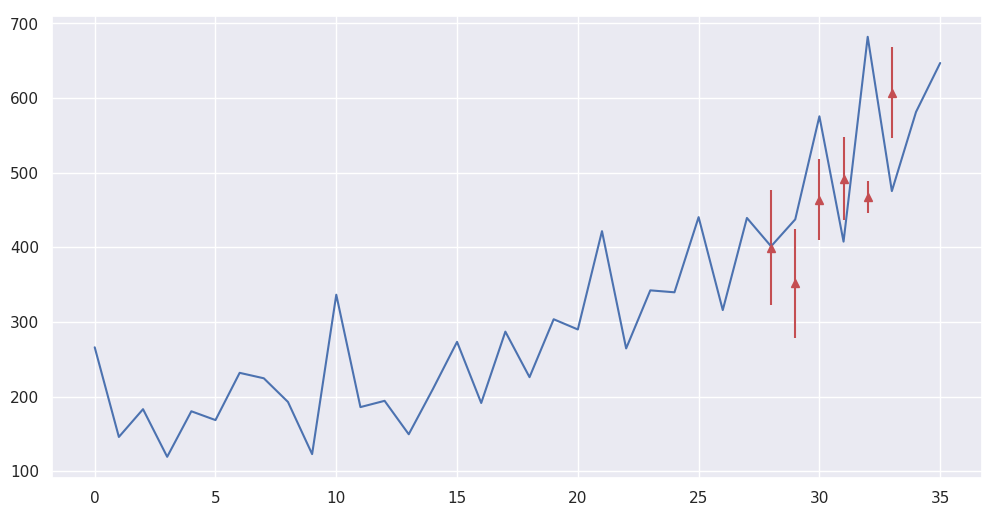

In [16]:
model.plot_forecasts(forecasts=forecasts,series=series, test=test)